# TP 3: Hasting-Metropolis (and Gibbs) samplers

In [4]:
# imports 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import invwishart
from tqdm import tqdm
np.random.seed(2024)

## Exercise 1: Hasting-Metropolis within Gibbs – Stochastic Approximation EM

#### 1. Write the complete log-likelihood of the previous model $ \log q(y, z, \theta ) $ and show that the proposed model belongs to the curved exponential family.

Cf pdf file.

#### 2. Generate synthetic data from the model by taking some reasonable values for the parameters.

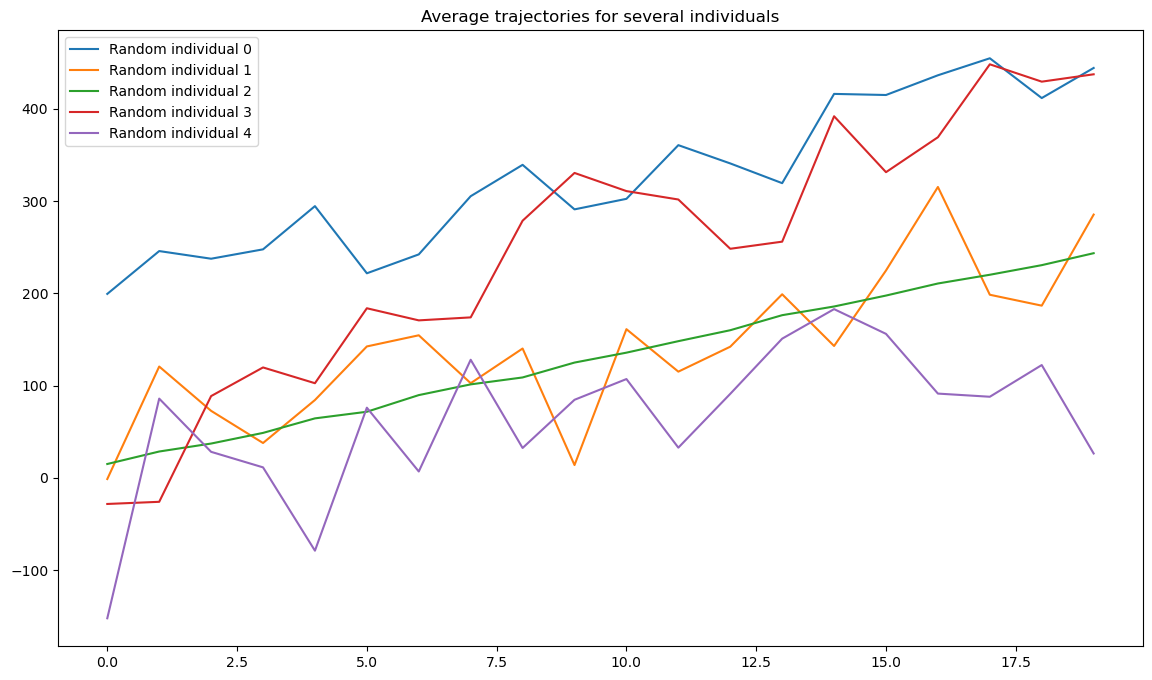

In [47]:
def average_trajectory(p_0, v_0, t_0):
    """ Returns a function that gives the average trajectory
    with initial position p_0, initial velocity v_0, and initial time t_0."""
    return lambda t: p_0 + v_0 * (t - t_0)

def individual_trajectory(p_0, v_0, t_0, alpha_i, tau_i):
    """ Returns a function that gives the individual trajectory
    """
    aver_traj = average_trajectory(p_0, v_0, t_0)
    return lambda t: aver_traj(alpha_i * (t - t_0 - tau_i) + t_0)

def initialize_parameters():
    """ Returns the initial parameters for the model.
    """
    N = 1000
    ki = 20 
    p_0 = 1    # we consider straight line trajectories
    sigma_p0 = 0.1
    sigma_v0 = 0.1
    sigma_t0 = 0.1
    return N, ki, p_0, sigma_p0, sigma_v0, sigma_t0

def generate_data(n_samples = 10 ** 4):
    """ Returns the generated data.
    """
    N, ki, p_0, sigma_p0, sigma_v0, sigma_t0 = initialize_parameters()
    Y = []        # [(N,ki) * n_samples]

    t0_bar = np.random.normal(5, 0.5, n_samples)    #time
    v0_bar = np.random.normal(10, 0.5, n_samples)    #velocity
    sigma_eps = invwishart.rvs(df = 3, scale = 5, size = n_samples)
    sigma_tau = invwishart.rvs(df = 3, scale = 5, size = n_samples)
    sigma = invwishart.rvs(df = 5, scale = 10, size = (n_samples, N))
    t_0 = np.random.normal(t0_bar, sigma_t0, n_samples)
    v_0 = np.random.normal(v0_bar, sigma_v0, n_samples)
    epsilons_i = np.random.normal(0, sigma_eps, (N, n_samples))
    alpha_i = np.exp(epsilons_i)    # size = (N, n_samples)
    tau_i = np.random.normal(0, sigma_tau, (N, n_samples))

    for n in tqdm(range(n_samples)):
        # generate the data for the n-th sample
        d = average_trajectory(p_0, v_0[n], t_0[n])
        y_i = []
        # in the n-th sample, we have N individuals with ki measurements
        for i in range(N):
            epsilon_i_j = np.random.normal(0, sigma[n, i], size = ki)   # for individual i
            d_i = individual_trajectory(p_0, v_0[n], t_0[n], alpha_i[i, n], tau_i[i, n])    # individual trajectory
            y_i_j = [d_i(j) for j in range(1, ki + 1)] + epsilon_i_j   # size = (N, ki)
            y_i.append(y_i_j)
        Y.append(y_i)
    return np.array(Y)

def generate_data_single():
    """ Returns the generated data.
    """
    N, ki, p_0, sigma_p0, sigma_v0, sigma_t0 = initialize_parameters()
    t0_bar = np.random.normal(5, 0.5)    #time
    v0_bar = np.random.normal(10, 0.5)    #velocity
    sigma_eps = invwishart.rvs(df = 2, scale = 3)
    sigma_tau = invwishart.rvs(df = 2, scale = 3)
    sigma = invwishart.rvs(df = 1.5, scale = 10, size = N)
    t_0 = np.random.normal(t0_bar, sigma_t0)
    v_0 = np.random.normal(v0_bar, sigma_v0)
    epsilons_i = np.random.normal(0.5, sigma_eps, N)
    alpha_i = np.exp(epsilons_i)    # size = (N, n_samples)
    tau_i = np.random.normal(0, sigma_tau, N)
    d = average_trajectory(p_0, v_0, t_0)
    Y = []
    for i in range(N):
        epsilon_i_j = np.random.normal(0, sigma[i], size = ki)   # for individual i
        d_i = individual_trajectory(p_0, v_0, t_0, alpha_i[i], tau_i[i])    # individual trajectory
        y_i = [d_i(j) for j in range(ki)] + epsilon_i_j   # size = (N, ki)
        Y.append(y_i)
    Y.append(y_i)
    return np.array(Y)


Y = generate_data_single()
plt.figure(figsize = (14, 8))
plt.title("Average trajectories for several individuals")
sample_index = np.random.choice(range(Y.shape[0]), 5, replace = False)
sample = Y[sample_index]
for i in range(5):
    plt.plot(range(Y.shape[1]), sample[i, :], label = f"Random individual {i}")
plt.legend()
plt.show()

In [37]:
Y.shape

(1001, 20)